# EJERCICIOS

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import os
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from keras.utils import to_categorical
from keras.applications import ResNet101V2
from keras.applications.resnet_v2 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.preprocessing import image_dataset_from_directory



## EJERCICIO 1

Crea tu propia CNN desde el principio e intenta conseguir la mayor exactitud posible con MNIST (por ejemplo 99% en el conjunto de prueba).

En vez de crear un conjunto de validación en el fit indica que porcentaje (10%) vas a usar para el conjunto de validación (validation_split)

Por ejemplo:
* 2 capas convolucionales (32 filtros)
* 1 capa maxpool
* 2 capas convolucionales (64 filtros)
* 1 capa maxpool
* 1 capa flatten
* 1 capa dropout
* 1 capa densa oculta
* 1 capa dropout
* 1 capa densa de salida

Usá como función de pérdida categorical_crossentropy.

Ten en cuenta que:
* sparse_categorical_crossentropy: se usa cuando las etiquetas de las clases están representadas como enteros (codificación entera), por ejemplo: 0, 1, 2, 3, ... para n clasess
* categorical_crossentropy: se usa cuando las etiquetas están representadas en formato one-hot encoded.

Tal y com tenemos los datos podemos usar directamente sparse_categorical_crossentropy, para poder aplicar categorical_crossentropy hay que hacer una transformación en y (to_categorical).

Haz una predicción y muestra la imagen con la etiqueta real y la predicha.

In [3]:
# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalización (escalar los valores de píxeles a [0,1])
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Añadir una dimensión extra para las capas convolucionales
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convertir las etiquetas a formato one-hot encoded
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Construcción del modelo CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo con 10% de validación
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.1)

# Evaluación en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")

# Predicción en una imagen de prueba
index = np.random.randint(0, x_test.shape[0])
sample_image = x_test[index]
sample_label = np.argmax(y_test[index])

pred = np.argmax(model.predict(np.expand_dims(sample_image, axis=0)))

plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"Real: {sample_label}, Predicción: {pred}")
plt.axis("off")
plt.show()


c:\Users\irune\OneDrive\Desktop\IABD\SAPA\SAPA\SAPA\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 53s 60ms/step - accuracy: 0.8287 - loss: 0.5127 - val_accuracy: 0.9872 - val_loss: 0.0414
Epoch 2/15
764/844 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.9712 - loss: 0.0953

KeyboardInterrupt: 

## EJERCICIO 2

Haz unas fotos con tu movil (a objetos) y usando alguno de los modelos que existen (por ejemplo ResNet101V2). Tendrás de adecuar el tamaño de las fotos antes de intentar predecir que es lo que has fotografiado.

Tendrás que investigar como añadir cargar tus images, un buen sitio por donde empezar es por la documentación de Keras para ResNEt101V2.

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


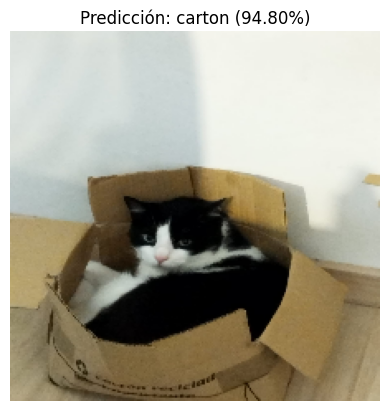

1. carton: 94.80%
2. skunk: 4.35%
3. guinea_pig: 0.18%


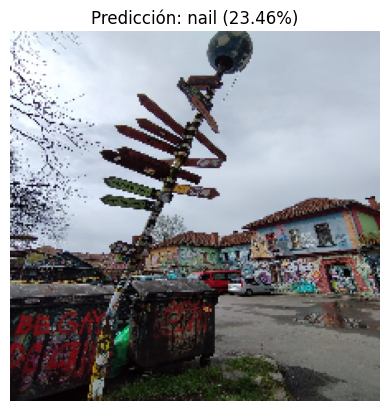

1. nail: 23.46%
2. paintbrush: 23.16%
3. wreck: 18.50%


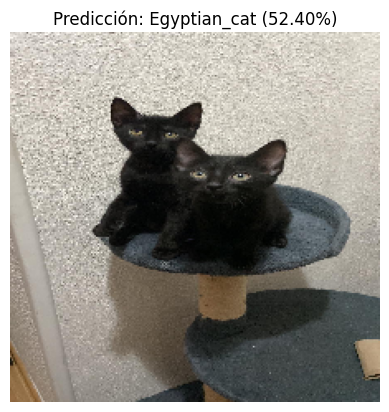

1. Egyptian_cat: 52.40%
2. Siamese_cat: 17.91%
3. tabby: 7.86%


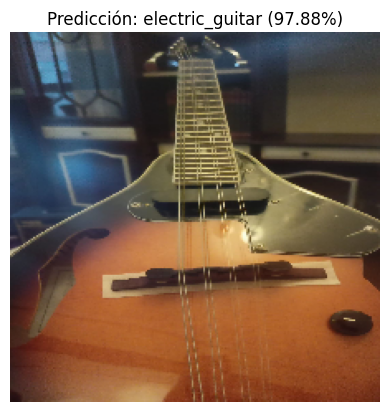

1. electric_guitar: 97.88%
2. acoustic_guitar: 1.91%
3. banjo: 0.15%


In [4]:
# Lista de rutas de imágenes
img_paths = ["mika.jpg", "akc_metalkova.jpg", "gatetes.jpg", "mandolina.jpg"]

# Cargar y preprocesar las imágenes
img_arrays = []
for img_path in img_paths:
    img = image.load_img(img_path, target_size=(224, 224))  # Redimensionar a 224x224
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)  # Normalizar la imagen para ResNet
    img_arrays.append(img_array)

# Convertir la lista de arrays a un array de NumPy
img_arrays = np.array(img_arrays)

# Cargar el modelo preentrenado
model = ResNet101V2(weights="imagenet")

# Hacer las predicciones
predictions = model.predict(img_arrays)
decoded_predictions = decode_predictions(predictions, top=3)  # Top-3 predicciones para cada imagen

# Mostrar las imágenes y los resultados
for i, img_path in enumerate(img_paths):
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicción: {decoded_predictions[i][0][1]} ({decoded_predictions[i][0][2]*100:.2f}%)")
    plt.show()

    # Mostrar las 3 mejores predicciones
    for j, (imagenet_id, label, score) in enumerate(decoded_predictions[i]):
        print(f"{j+1}. {label}: {score*100:.2f}%")


## EJERCICIO 3

El dataset food101 es un conjunto de datos consta de 101 categorías de alimentos, con 101000 imágenes. Para cada clase, se proporcionan 250 imágenes de prueba revisadas manualmente, así como 750 imágenes de entrenamiento. A propósito, las imágenes de entrenamiento no se limpiaron y, por lo tanto, aún contienen cierta cantidad de ruido. Esto viene principalmente en forma de colores intensos y, a veces, etiquetas incorrectas. Todas las imágenes se redimensionaron para tener una longitud lateral máxima de 512 píxeles.
* Carga el conjunto de imagenes: entrenamiento, validación (coge la mitad de los datos de prueba) y prueba (coge la otra mitad de los datos de prueba)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añade más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambia el tamaño para que sea adecuado para el modelo, normaliza...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2): coge todo menos la última capa y añade una capa globalaveragepooling y la capa dense de salida. En este caso utiliza como función de pérdida sparse_categorical_crossentropy
* Busca una imagen de comida en Internet y haz una predicción

Por defecto tensorflow busca y descarga los dato en:
* Linux/Mac: ~/tensorflow_datasets/
* Windows: C:\Users\<usuario>\tensorflow_datasets\

Los datos puedes copiarlo de mi disco duro o descarlos, pero son 5.12GB

In [5]:
data, info = tfds.load('food101', split=["validation[:50%]", "validation[50%:]", "train"], with_info=True, as_supervised=True)

test_set_raw = data[0] 
valid_set_raw = data[1]  
train_set_original_raw = data[2]  

class_names = info.features['label'].names

In [6]:
num_classes = len(class_names)
print(f"Número de clases: {num_classes}")
print(f"Clases: {class_names}")


Número de clases: 101
Clases: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_

In [17]:
num_test = sum(1 for _ in test_set_raw)
num_val = sum(1 for _ in valid_set_raw)
num_train = sum(1 for _ in train_set_original_raw)
print(f"Número de ejemplos de prueba: {num_test}")
print(f"Número de ejemplos de validación: {num_val}")
print(f"Número de ejemplos de entrenamiento: {num_train}")

Número de ejemplos de prueba: 12625
Número de ejemplos de validación: 12625
Número de ejemplos de entrenamiento: 75750


imagenes de entrenamiento


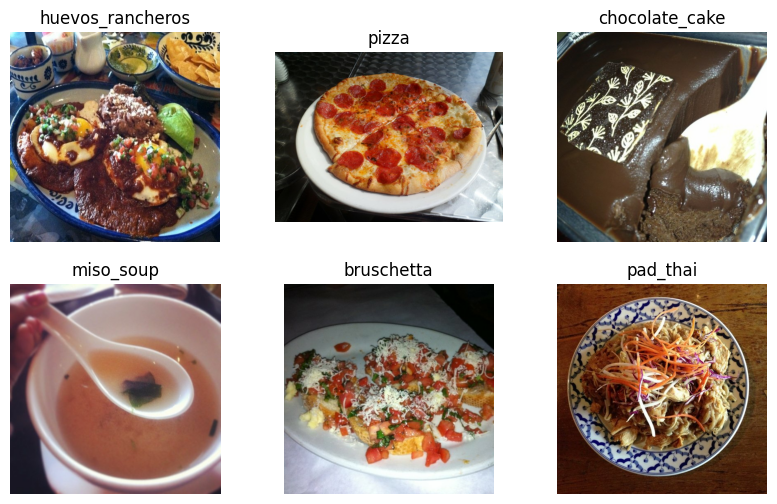

In [8]:
def show_images(dataset, num_images=6):
    plt.figure(figsize=(10, 6))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(2, 3, i+1)
        plt.imshow(image.numpy())
        plt.title(class_names[label.numpy()])
        plt.axis("off")
    plt.show()

print("imagenes de entrenamiento")
show_images(train_set_original_raw)

imagenes de validación


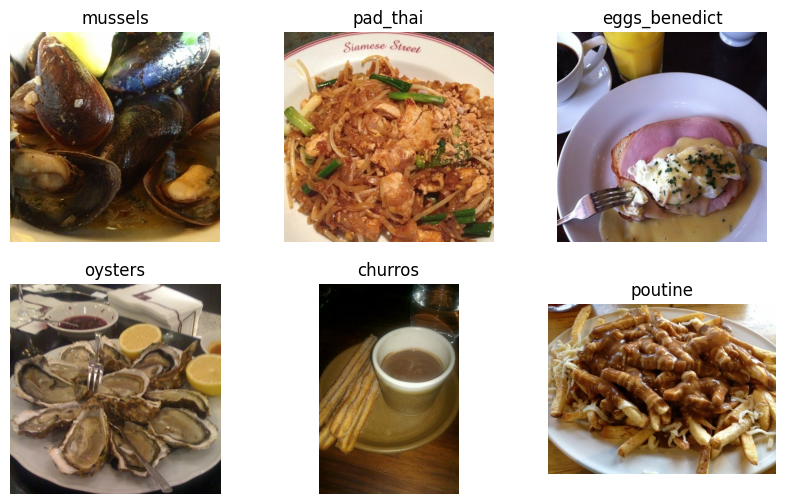

In [9]:
print("imagenes de validación")
show_images(valid_set_raw)

imagenes de prueba


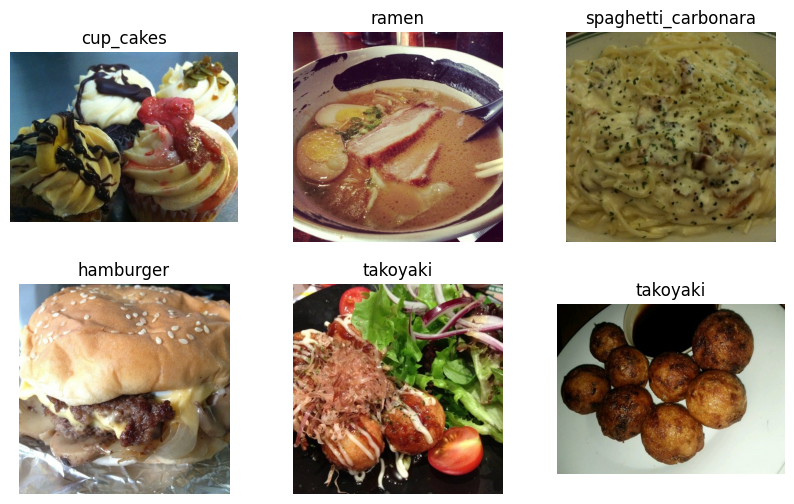

In [10]:
print("imagenes de prueba")
show_images(test_set_raw)

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 5

# Definir el aumento de datos para mejorar la generalización del modelo
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),  # Volteo horizontal aleatorio
    tf.keras.layers.RandomRotation(0.2),  # Rotación aleatoria (20% en cada dirección)
    tf.keras.layers.RandomZoom(0.2),  # Zoom aleatorio (20%)
    tf.keras.layers.RandomContrast(0.2),  # Contraste aleatorio
    tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2),  # Desplazamientos aleatorios
    tf.keras.layers.RandomBrightness(0.2),  # Brillo aleatorio
    tf.keras.layers.RandomCrop(IMG_SIZE, IMG_SIZE)  # Recorte aleatorio
])

# Función para preprocesar las imágenes (redimensionar y normalizar)
def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  # Redimensionar la imagen
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)  # Normalizar la imagen
    return image, label

# Aplicar el preprocesamiento y aumento de datos al conjunto de entrenamiento
train_set = train_set_original_raw.map(lambda image, label: preprocess_image(image, label), num_parallel_calls=tf.data.AUTOTUNE)

# Mezclar, agrupar en lotes y prefetch para mejorar el rendimiento
train_set = train_set.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Aplicar preprocesamiento y batching a los conjuntos de validación y prueba
valid_set = valid_set_raw.map(lambda image, label: preprocess_image(image, label), num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_set = test_set_raw.map(lambda image, label: preprocess_image(image, label), num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [19]:
# Crear el modelo con MobileNetV2 preentrenado y eliminar la última capa
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')

# Congelar las capas del modelo base (MobileNetV2) para que no se actualicen durante el entrenamiento inicial
base_model.trainable = False

# Construir el modelo completo añadiendo capas adicionales al modelo base
model = tf.keras.Sequential([
    base_model,  # Modelo base MobileNetV2 sin las capas superiores
    tf.keras.layers.GlobalAveragePooling2D(),  # Capa de pooling global para reducir la dimensionalidad
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Capa de salida con 101 neuronas (una por cada clase de Food101)
])

# Compilar el modelo especificando el optimizador, la función de pérdida y las métricas a evaluar
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con las capas del modelo base congeladas (solo se entrenarán las capas añadidas)
history = model.fit(train_set, epochs=EPOCHS, validation_data=valid_set)

Epoch 1/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1297s 545ms/step - accuracy: 0.0143 - loss: 4.8118 - val_accuracy: 0.0220 - val_loss: 4.7171
Epoch 2/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1266s 534ms/step - accuracy: 0.0210 - loss: 4.7071 - val_accuracy: 0.0246 - val_loss: 4.7083
Epoch 3/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1234s 520ms/step - accuracy: 0.0256 - loss: 4.6895 - val_accuracy: 0.0299 - val_loss: 4.6204
Epoch 4/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1429s 603ms/step - accuracy: 0.0272 - loss: 4.6651 - val_accuracy: 0.0321 - val_loss: 4.6202
Epoch 5/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1412s 595ms/step - accuracy: 0.0283 - loss: 4.6568 - val_accuracy: 0.0349 - val_loss: 4.5887


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


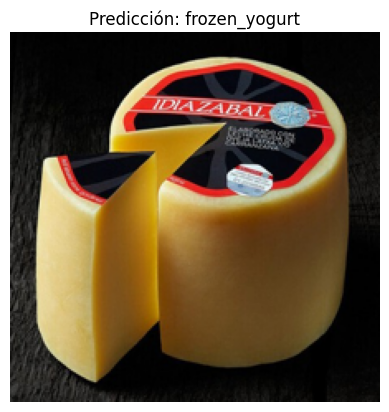

In [ ]:
from PIL import Image

img_path = "gazta.jpg"

# Cargar la imagen
img = Image.open(img_path)
img = img.resize((IMG_SIZE, IMG_SIZE))
img_array = np.array(img) / 255.0  # Normalizar
img_array = np.expand_dims(img_array, axis=0)  # Añadir batch

# Hacer la predicción
pred = model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]

plt.imshow(img)
plt.title(f"Predicción: {predicted_class}")
plt.axis("off")
plt.show()


## EJERCICIO 4

Repite el ejercicio pero para otros datos (tienes conjuntos de datos en https://www.tensorflow.org/datasets/catalog/overview?hl=es-419 en el apartado image classificación, por ejemplo puedes usar stanford_dogs) y utilizando otra de las redes conocidas que no se haya utilizado todavía.
Para cargar los datos en este caso vas a descargar las imagnes a tu ordenador y cargarlos desde ahi (descargar la carpeta al ordenador y luego cargarlo desde la carpeta con python (mage_dataset_from_director)):

* Carga el conjunto de imagenes (entrenamiento, validación y pruebas)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añadir más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambiar el tamaño para que sea adecuado para el modelo, normalizar...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2)
* Busa una imagen en Internet y haz una predicción

Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.
Número de clases: 120


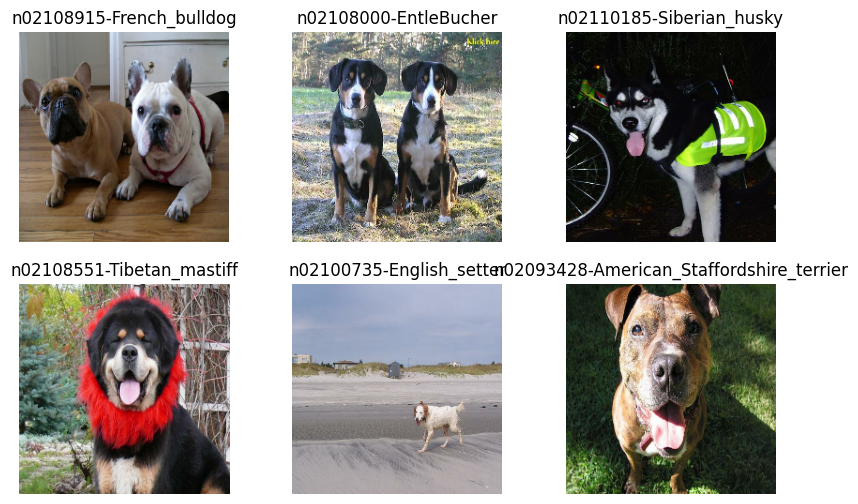

Epoch 1/5
515/515 ━━━━━━━━━━━━━━━━━━━━ 1249s 2s/step - accuracy: 0.2463 - loss: 3.4601 - val_accuracy: 0.7172 - val_loss: 0.9468
Epoch 2/5
515/515 ━━━━━━━━━━━━━━━━━━━━ 1241s 2s/step - accuracy: 0.4750 - loss: 2.0122 - val_accuracy: 0.7340 - val_loss: 0.9228
Epoch 3/5
515/515 ━━━━━━━━━━━━━━━━━━━━ 1561s 3s/step - accuracy: 0.5230 - loss: 1.7852 - val_accuracy: 0.7415 - val_loss: 0.9032
Epoch 4/5
515/515 ━━━━━━━━━━━━━━━━━━━━ 1606s 3s/step - accuracy: 0.5540 - loss: 1.6598 - val_accuracy: 0.7388 - val_loss: 0.9105
Epoch 5/5
515/515 ━━━━━━━━━━━━━━━━━━━━ 1286s 2s/step - accuracy: 0.5790 - loss: 1.5203 - val_accuracy: 0.7427 - val_loss: 0.9029
129/129 ━━━━━━━━━━━━━━━━━━━━ 112s 868ms/step - accuracy: 0.7429 - loss: 0.9104
Precisión en el conjunto de prueba: 0.7427


In [2]:
# Definir parámetros
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 5
DATASET_DIR = "stanford_dogs"
# Cargar el dataset desde el directorio
train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Nombres de clases
class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"Número de clases: {num_classes}")

# Mostrar algunas imágenes
def show_images(dataset, num_images=6):
    plt.figure(figsize=(10, 6))
    for images, labels in dataset.take(1):
        for i in range(num_images):
            plt.subplot(2, 3, i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i].numpy()])
            plt.axis("off")
    plt.show()

show_images(train_dataset)

# Preprocesamiento y aumento de datos
random_zoom = tf.keras.layers.RandomZoom(0.1)  # Crear la capa RandomZoom fuera de la función

def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)  # Redimensionar
    image = tf.cast(image, tf.float32) / 255.0  # Normalizar
    return image, label

def augment(image, label):
    image = tf.image.random_flip_left_right(image)  # Espejo horizontal
    image = tf.image.rot90(image, np.random.choice([0, 1, 2, 3]))  # Rotación aleatoria
    image = random_zoom(image)  # Zoom aleatorio
    return preprocess(image, label)

train_dataset = train_dataset.map(augment).shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.map(preprocess).prefetch(tf.data.AUTOTUNE)

# Cargar modelo base InceptionV3
base_model = tf.keras.applications.InceptionV3(input_shape=(224, 224, 3),
                                               include_top=False, weights="imagenet")
base_model.trainable = False  # Congelar pesos

# Crear modelo
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_classes, activation="softmax")  # Número de clases de perros
])

# Compilar modelo
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Entrenar el modelo
history = model.fit(train_dataset, validation_data=val_dataset, epochs=EPOCHS)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(val_dataset)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


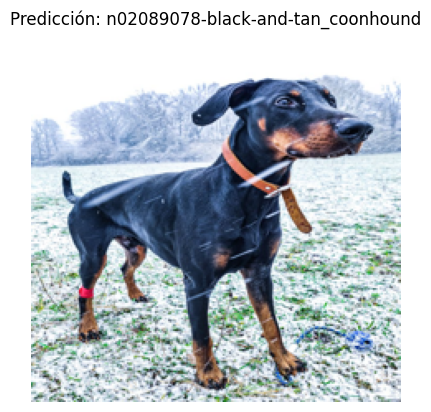

In [4]:
from PIL import Image
# Cargar la imagen y preprocesarla
img = Image.open("rin.jpg").resize(IMG_SIZE)
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Añadir batch

pred = model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]

plt.imshow(img)
plt.title(f"Predicción: {predicted_class}")
plt.axis("off")
plt.show()


## EJERCICIO 5

Sigue el tutorial de TensorFlow Style Transfer (https://homl.info/styletuto) hasta definir representaciones de contenido y estilo (hay que hacer sólo los primeros puntos, hasta el punto  Transferencia de estilo rápido usando TF-Hub (incluido)).

Haz algo parecido no igual (por lo menos cambia de imagenes).

Además tienes que poner comentarios para explicar con tus palabras lo que estas haciendo.

Realmente lo que esta haciendo es aplicar una capas convolucionales a una imagen, donde los filtros se han sacado de otra imagen.

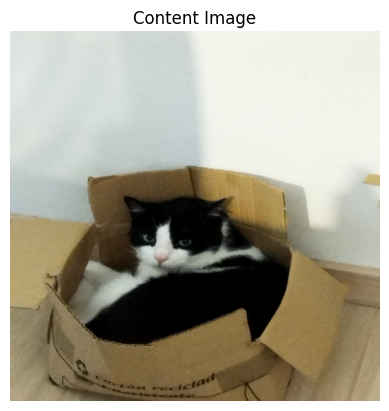

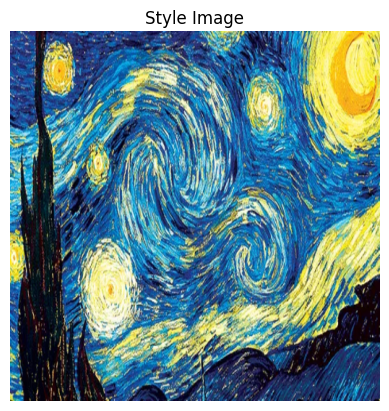

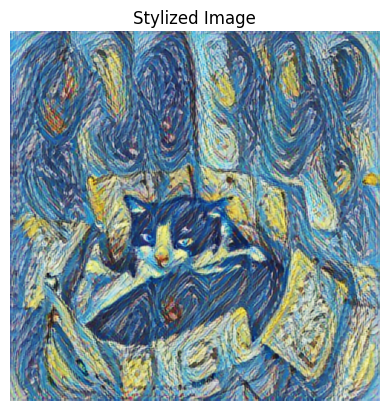

In [ ]:
from PIL import Image

def load_img(path_to_img):
    max_dim = 512
    img = Image.open(path_to_img)
    img = img.convert('RGB')
    img = np.array(img)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, (max_dim, max_dim))
    img = img[tf.newaxis, :]
    return img

def show_img(img, title=None):
    img = np.squeeze(img, axis=0)
    plt.imshow(img)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

# Cargar imágenes de contenido y estilo
content_path = 'mika.jpg'
style_path = 'noche_estrellada.webp'

content_image = load_img(content_path)
style_image = load_img(style_path)

# Mostrar imágenes de contenido y estilo
show_img(content_image, 'Content Image')
show_img(style_image, 'Style Image')

# Cargar el modelo de transferencia de estilo de TF-Hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Aplicar el modelo a las imágenes de contenido y estilo
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

show_img(stylized_image, 'Stylized Image')

## EJERCICIO 6

Crea un modelo sencillo que aplique un filtro personalizado a una imagen de contenido mediante una capa convolucional es un buen ejercicio para entender cómo funcionan las convoluciones en el procesamiento de imágenes.

Carga una imagen desde archivo preparala para se procesada por la red:
* Cargar la imagen (tf.keras.preprocessing.image.load_im)
* Convertir la imagen a un tensor de NumPy y redimensionarla:
    * tf.keras.preprocessing.image.img_to_array
    * tf.image.resize
* Añadir una dimensión de batch al tensor de la imagen (np.expand_dims)


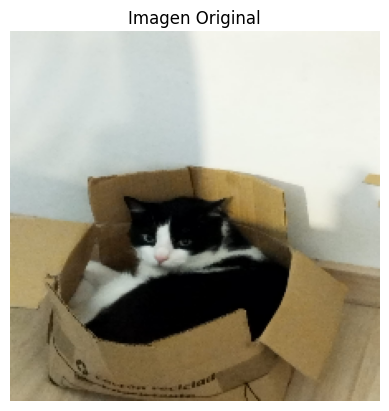

In [ ]:
image_path = 'mika.jpg'
image = tf.keras.preprocessing.image.load_img(image_path)

# Convertir la imagen a un tensor de NumPy y redimensionarla
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = tf.image.resize(image_array, IMG_SIZE)

# Añadir una dimensión de batch al tensor de la imagen
image_array = np.expand_dims(image_array, axis=0)

# Mostrar la imagen original
plt.imshow(image_array[0].astype('uint8'))
plt.title("Imagen Original")
plt.axis("off")
plt.show()

Define un filtro personalizado para aplicar a la imagen. Los filtros son matrices pequeñas que modifican los píxeles de la imagen al aplicar la convolución.

Por ejemplo aquí tienes un filtro de bordes:

```python
filtro = np.array([
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
], dtype=np.float32)
```
El filtro debe tener forma (altura, anchura, canales_entrada, canales_salida) (usa reshape)

In [ ]:
# Definir un filtro personalizado para detectar bordes
filtro = np.array([
    [[[-1]], [[-1]], [[-1]]],
    [[[-1]], [[ 8]], [[-1]]],
    [[[-1]], [[-1]], [[-1]]]
], dtype=np.float32)

# Ajustar la forma del filtro a (altura, anchura, canales_entrada, canales_salida)
filtro = np.repeat(filtro, 3, axis=2)  # Repetir el filtro para los 3 canales de entrada (RGB)

Crea un modelo secuencial en Keras con una única capa convolucional que utilice tu filtro personalizado.

In [ ]:
# Crear un modelo secuencial en Keras con una única capa convolucional que utilice el filtro personalizado
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), padding='same', input_shape=(224, 224, 3), use_bias=False, kernel_initializer=tf.constant_initializer(filtro))
])

# Aplicar el modelo a la imagen
filtered_image = model.predict(image_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Visualiza el resultado (muestra la imagen original y la imagen con el filtro y pon un título a cada imagen)

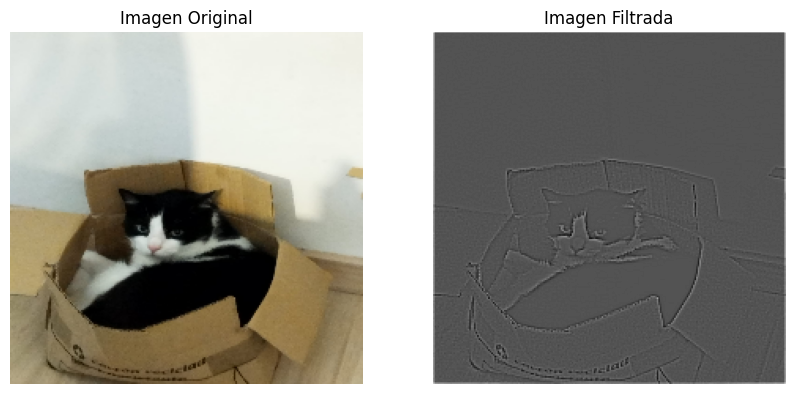

In [ ]:

# Mostrar la imagen original y la imagen filtrada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array[0].astype('uint8'))
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered_image[0, :, :, 0], cmap='gray')
plt.title("Imagen Filtrada")
plt.axis("off")

plt.show()

## EJERCICIO 7
Repite el ejercicio anterior con diferentes modelos y filtros:
* Prueba otro filtro (mostrar imagen original e imagen con filtro)
* Prueba con tres filtros a la vez (mostrar la imagen resultante de cada filtro)
* Prueba con tres filtros y dos capas convolucionales (mostrar imagen original e imagne con filtro)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


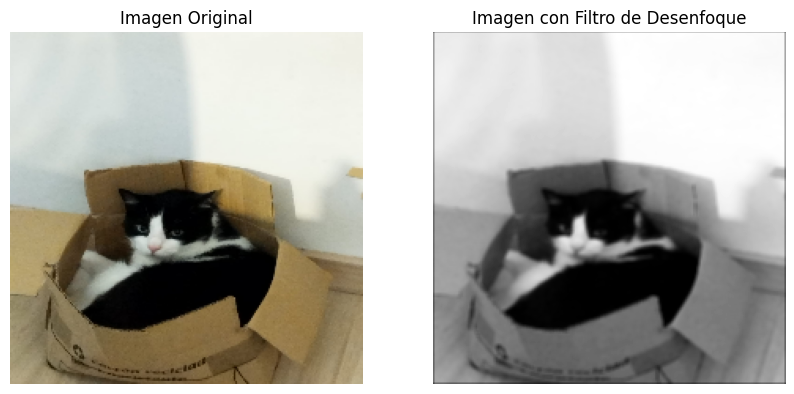

In [ ]:
# Definir otro filtro personalizado (filtro de desenfoque)
filtro_desenfoque = np.array([
    [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]],
    [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]],
    [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]
], dtype=np.float32)

# Ajustar la forma del filtro a (altura, anchura, canales_entrada, canales_salida)
filtro_desenfoque = filtro_desenfoque.reshape((3, 3, 3, 1))

# Crear un modelo secuencial en Keras con una única capa convolucional que utilice el filtro de desenfoque
model_desenfoque = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), padding='same', input_shape=(224, 224, 3), use_bias=False, kernel_initializer=tf.constant_initializer(filtro_desenfoque))
])

# Aplicar el modelo a la imagen
filtered_image_desenfoque = model_desenfoque.predict(image_array)

# Mostrar la imagen original y la imagen con el filtro de desenfoque
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array[0].astype('uint8'))
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered_image_desenfoque[0, :, :, 0], cmap='gray')
plt.title("Imagen con Filtro de Desenfoque")
plt.axis("off")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


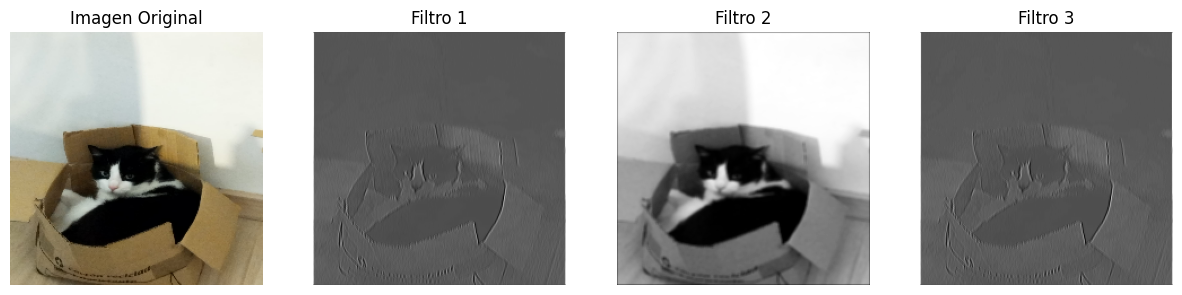

In [ ]:
# Definir tres filtros personalizados
filtro_1 = np.array([
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
], dtype=np.float32)

filtro_2 = np.array([
    [[0.11111111, 0.11111111, 0.11111111], [0.11111111, 0.11111111, 0.11111111], [0.11111111, 0.11111111, 0.11111111]],
    [[0.11111111, 0.11111111, 0.11111111], [0.11111111, 0.11111111, 0.11111111], [0.11111111, 0.11111111, 0.11111111]],
    [[0.11111111, 0.11111111, 0.11111111], [0.11111111, 0.11111111, 0.11111111], [0.11111111, 0.11111111, 0.11111111]]
], dtype=np.float32)

filtro_3 = np.array([
    [[0, -1, 0], [-1, 4, -1], [0, -1, 0]],
    [[0, -1, 0], [-1, 4, -1], [0, -1, 0]],
    [[0, -1, 0], [-1, 4, -1], [0, -1, 0]]
], dtype=np.float32)

filtro_1 = filtro_1.reshape((3, 3, 3, 1))
filtro_2 = filtro_2.reshape((3, 3, 3, 1))
filtro_3 = filtro_3.reshape((3, 3, 3, 1))

model_tres_filtros = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), padding='same', input_shape=(224, 224, 3), use_bias=False, kernel_initializer=tf.constant_initializer(np.concatenate([filtro_1, filtro_2, filtro_3], axis=-1)))
])

filtered_images = model_tres_filtros.predict(image_array)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(image_array[0].astype('uint8'))
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(filtered_images[0, :, :, 0], cmap='gray')
plt.title("Filtro 1")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(filtered_images[0, :, :, 1], cmap='gray')
plt.title("Filtro 2")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(filtered_images[0, :, :, 2], cmap='gray')
plt.title("Filtro 3")
plt.axis("off")

plt.show()